# Практикум по лекции 1 "Введение в математическую статистику"

## Рецепты для быстрого решения задач

**1. Как выбрать и распознать распределение?**  
- Число успехов в фиксированном числе независимых испытаний -> биномиальное.  
- Время между событиями -> экспоненциальное/гамма.  
- Число событий в интервале -> пуассон.  
- Сумма большого числа независимых вкладов -> применяем ЦПТ (нормальное приближение).

**2. Предельные теоремы**  
- ***Закон больших чисел:*** среднее сходится к математическому ожиданию.  
> *Идея:* если повторять случайный эксперимент много раз, то средний результат всё ближе и ближе к ожидаемому (среднему теоретическому) значению.

    > *Пример:* подбрасываем монету, вероятность орла - 0.5; если подбросить монету 10 раз — орлы могут выпасть 3, 6 или 7 раз; если подбросить 10 000 раз — доля орлов будет уже очень близка к 0.5.
- ***Центральная предельная теорема:*** стандартизируйте сумму/среднее и используйте $N(0,1)$.  
> *Идея:* если сложить (или усреднить) много независимых случайных величин, то их распределение становится приближённо нормальным (колоколообразным), даже если исходные величины распределены по-другому.

    > *Пример:* пусть студенты случайным образом получают баллы за тест (распределение может быть каким угодно — с перекосом, ступеньками и т.д.); если посчитать средний балл по большому числу студентов, то распределение этих средних будет похоже на нормальное.
- ***Муавра-Лапласа:*** частный случай ЦПТ для биномиального распределения (подбрасывания монеты, успехи/неудачи и т.п.).

$$
P(k_1 \leq k \leq k_2) \approx
\Phi\!\left( \frac{k_2 - np}{\sqrt{npq}} \right) -
\Phi\!\left( \frac{k_1 - np}{\sqrt{npq}} \right),
$$

    где
$$
q = 1 - p, \quad
\Phi(x) = \frac{1}{\sqrt{2\pi}} \int\limits_{-\infty}^{x} e^{-\frac{t^2}{2}} , dt
$$

а n — число испытаний, p — вероятность успеха в одном испытании.

> *Идея:* если вероятность успеха p, а число испытаний n велико, то число успехов k можно приближать нормальным распределением.

> *Пример:* если подбросить монету 100 раз, то вероятность того, что орёл выпадет от 45 до 55 раз, можно приближённо посчитать через нормальное распределение со средним np=50 и дисперсией npq=25.


In [ ]:
from math import comb

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import (
    binom, hypergeom,
    expon, norm,
    nbinom, poisson,
)

### Задача 1

**Условие.** В урне 5 белых и 7 чёрных шаров. Достанут 3 шара без возвращения. Какова вероятность, что ровно 2 белых?

**Рецепт:** дискретная модель без возвращения -> гипергеометрическое распределение.

$$P(X = k) = \frac{\binom{K}{k} \, \binom{N - K}{n - k}}{\binom{N}{n}}$$

**Решение:**
- Число способов выбрать 2 белых из 5: `C(5,2)`.
- Выбрать 1 чёрный из 7: `C(7,1)`.
- Всего способов выбрать 3 из 12: `C(12,3)`.
- Вероятность = `C(5,2)*C(7,1)/C(12,3)`.

$$
P=\dfrac{\binom{5}{2}\,\binom{7}{1}}{\binom{12}{3}}=\dfrac{7}{22}\approx0.31818.
$$


In [ ]:
help(hypergeom.pmf)

Help on method pmf in module scipy.stats._distn_infrastructure:

pmf(k, *args, **kwds) method of scipy.stats._discrete_distns.hypergeom_gen instance
    Probability mass function at k of the given RV.
    
    Parameters
    ----------
    k : array_like
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        Location parameter (default=0).
    
    Returns
    -------
    pmf : array_like
        Probability mass function evaluated at k



In [ ]:
comb(5,2)*comb(7,1)/comb(12,3)

0.3181818181818182

In [ ]:
# параметры
N = 12  # всего шаров
K = 5   # белых
n = 3   # достаём
k = 2   # интересует ровно 2 белых

hypergeom.pmf(k, N, K, n)

0.31818181818181823

### Задача 2

**Условие.** Модель проходит 20 независимых теста, вероятность успеха в каждом - 0.2. Найти вероятность ровно 5 успешных тестов `P(X=5)` и математическое ожидание числа успехов `E[X]`.

**Рецепт:** бинарные испытания -> `Bin(n,p)`, `E[X]=n*p`.

**Решение:**

$$P(X=5)=\binom{20}{5}0.2^5 0.8^{15},\quad E[X]=20\cdot0.2=4.$$


In [ ]:
k = 5
n = 20
p = 0.2
binom.pmf(k, n, p), binom.mean(n, p)

(0.17455952155688056, 4.0)

In [ ]:
# help(binom)

### Задача 3

**Условие.** Вероятность успеха `p=0.3`. Какова вероятность, что до третьего успеха потребуется ровно 8 испытаний? Найти `P(первый успех на 4-м)` и `P(третий успех на 8-м)`.

**Рецепт:** первый успех на k-м -> геометрическое: $P(K=k)=(1-p)^{(k-1)}p$.

Для r-го успеха используется отрицательное биномиальное:

$$P(X = k) = \binom{k - 1}{r - 1} p^{r} (1 - p)^{k - r}, \quad k = r, r + 1, \ldots$$

**Решение:**

Первый успех: $P=(1-p)^3 p$.

Третий на 8-м: $P=\binom{7}{2} p^3 (1-p)^5$.


In [ ]:
nbinom.pmf(8-3, 3, 0.3)

0.09529569000000004

In [ ]:
comb(7, 2) * 0.3**3 * (1 - 0.3)**5

0.09529568999999996

### Задача 4

**Условие.** В минуту в среднем 2 события. Какова вероятность, что за 3 минуты произойдёт ровно 5 событий? Параметр $\lambda=2\cdot3=6$. Найти `P(X=5)`.

**Решение:** $lambda=2*3=6,$ $$P(X=5)=\frac{exp(-6)*6^5}{5!}$$


In [ ]:
poisson.pmf(5, 6)

0.16062314104797995

In [ ]:
np.exp(-6) * 6**5 / 120

0.16062314104798003

*PS: при большом lambda можно приближать нормальным: N(lambda, lambda).*

### Задача 5

**Условие.** Время между событиями экспоненциально с параметром `lambda=0.5` (мин). Какова вероятность, что интервал превысит 3 минуты? Какова медиана?

**Рецепт:** `P(X>t)=exp(-lambda*t)`. Медиана m: `exp(-lambda*m)=0.5` -> `m=ln(2)/lambda`.


**Решение:** $P(X>3)=e^{-1.5},\ m=\ln 2/0.5$.


In [ ]:
1 - expon.cdf(3, scale=1/0.5)

0.2231301601484298

In [ ]:
np.exp(-1.5)

0.22313016014842982

In [ ]:
np.log(2)*2

1.3862943611198906

### Задача 6

**Условие.** `X~Pois(l1)`, `Y~Pois(l2)`. Найти распределение `X+Y`.

**Рецепт:** сумма независимых `Poisson -> Poisson(lambda1+lambda2)`.

**Решение:** $X+Y \sim Pois(l1+l2)$.


In [ ]:
l1, l2 = 2, 3
samples1 = poisson.rvs(l1, size=100000)
samples2 = poisson.rvs(l2, size=100000)
samples12 = samples1 + samples2
np.mean(samples12), l1 + l2

(4.98816, 5)

### Задача 7

**Условие.** Есть распределение с $E=5$, $Var=9$. Для $n=100$ найти $P(\bar X > 5.5)$. Используем ЦПТ.

**Решение:**

$stand\_error=\frac{\sigma}{n} = \frac{\sqrt{9}}{100} = 0.3$

$z(x)=\frac{x - \mu}{stand\_error} =(5.5-5)/0.3\approx 1.6667,$

$P\approx 1-Φ(1.6667)\approx0.0478$.

PS: Ф - функция распределения стандартного нормального закона,

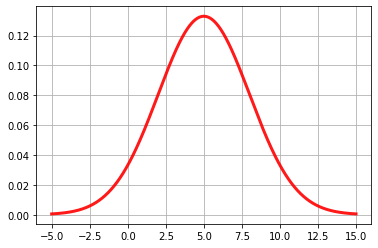

In [ ]:
x = np.linspace(-5, 15, 3000)
plt.plot(x, norm.pdf(x, 5, 3), 'r-', lw=3, alpha=0.9)
plt.grid()
plt.show()

In [ ]:
1 - norm.cdf((5.5 - 5) / 0.3)

0.047790352272814696

In [ ]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

### Задача 8

**Условие.** $Bin(n=200, p=0.4)$. Найти $P(X >= 90)$ с поправкой 0.5 (Муавр-Лаплас).

**Решение:** приближать N(80, 48), применить 89.5 в качестве порога.

$\mu=80, \sigma=\sqrt{48}$, порог 89.5, $z\approx 1.3712,$ $P\approx0.0852$.


In [ ]:
1 - norm.cdf((89.5 - 80) / np.sqrt(48))

0.08515523559322069

### Задача 9

**Условие.** $X_i$ IID с $E=10$ (например, $Exp(1/10)$). Покажите на симуляции сходимость средних.

**Решение:** $Var(\bar X)=\sigma^2/n -> 0$, Чебышёв -> сходимость.


In [ ]:
help(np.random.exponential)

Help on built-in function exponential:

exponential(...) method of numpy.random.mtrand.RandomState instance
    exponential(scale=1.0, size=None)
    
    Draw samples from an exponential distribution.
    
    Its probability density function is
    
    .. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),
    
    for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
    which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
    The rate parameter is an alternative, widely used parameterization
    of the exponential distribution [3]_.
    
    The exponential distribution is a continuous analogue of the
    geometric distribution.  It describes many common situations, such as
    the size of raindrops measured over many rainstorms [1]_, or the time
    between page requests to Wikipedia [2]_.
    
    .. note::
        New code should use the `~numpy.random.Generator.exponential`
        method of a `~numpy.random.Generator` instanc

In [ ]:
np.random.seed(1)
def simulate_last_mean(n):
    x = np.random.exponential(scale=10, size=n)
    return x.cumsum()[-1]/n

for n in [10,100,1000,10000,100000]:
    print(n, simulate_last_mean(n))

10 4.33895512579412
100 10.737488893608269
1000 9.921202445283294
10000 9.88176298490699
100000 10.00613653485653


### Задача 10

**Условие.** Оценить $P(|barX - 0.6| >= 0.05)$ через Чебышёва для $n=100$ и $n=1000$.

**Решение:** $$bound = \frac{p(1-p)}{(n*ε^2)} = \frac{0.24}{(n*0.0025)} = \frac{96}{n}.$$
